# Pru Wealth Data Test

Below we will explore a mock database of customers, policies and funds that are similar to the Pru Wealth data. The first section of this notebook will test your SQL skills, the second section will test your Python skills and visualisation skills.

The database file is called Prudential_Data.db

The three tables included in this database are:
* Customer_Table
* Policy_Table
* Fund_Table

You will need to have the following packages installed in your Python environment:
* numpy
* pandas
* sqlite3

For visualization use any package of your choice (e.g., matplotlib, seaborn, plotly).

Please complete and return the test before the deadline by emailing your copy of this notebook to: Denholm.Hesse@Prudential.co.uk. If you do not know the answer to a question feel free to use Google and Stack Overflow. This is to give you the option to teach yourself a concept from the internet to address a question which you do not know the answer to, please refrain from skipping questions. The test is meant to be completed by you only.

Good luck and have fun!

In [238]:
import numpy as np
import pandas as pd
import sqlite3

# SQL test

IMPORANT: Please make sure all questions in this section are solved using SQL by only editing the content of the variable *sqlite_query*. Please do not edit the below cell:

In [237]:
# Establish DB connection
conn = sqlite3.connect('Prudential_Data.db')

Below is an example of how to query the SQLlite databse from this Jupyter notebook. Please note that SQLlite might have a slightly different syntax from the SQL you normally use. Please do not edit the below cell:

In [28]:
sqlite_query = """
SELECT COUNT(*) 
from policy_table 
"""

pd.read_sql(sqlite_query, conn)

,COUNT(*)
0,1635


The first table "Customer_Table" contains personal information about the customers. Please do not edit the below cell:

In [6]:
sqlite_query = """
SELECT * 
from Customer_Table 
limit 5
"""

pd.read_sql(sqlite_query, conn)

,index,Customer ID,Email,Gender,Age,Postcode
0,0,CO183683,NLUPPITT14@PARALLELS.COM,Male,90,None
1,1,CO314757,None,Female,90,None
2,2,CO720602,None,Female,90,None
3,3,CO34804,None,Female,90,1495-701
4,4,CO474411,None,Male,90,301288


The second table "Policy_Table" contains data relating to customer policies. The policy value is the current value of the policy. Please do not edit the below cell:

In [7]:
sqlite_query = """
SELECT * 
from Policy_Table 
limit 5
"""

pd.read_sql(sqlite_query, conn)

,index,Policy Number,Customer ID,Product Category,Product Name,Policy Value,Policy Start Date
0,0,RET100072,CO276506,RETIREMENT,RETIREMENT ACCOUNT,270033.0,2016-01-02 00:00:00
1,1,RET100931,CO831289,RETIREMENT,RETIREMENT ACCOUNT,26394.0,2016-01-04 00:00:00
2,2,RET100682,CO784249,RETIREMENT,RETIREMENT ACCOUNT,773567.0,2016-01-04 00:00:00
3,3,RET100447,CO295533,RETIREMENT,RETIREMENT ACCOUNT,35512.0,2016-01-07 00:00:00
4,4,RET100390,CO901735,RETIREMENT,RETIREMENT ACCOUNT,767580.0,2016-01-08 00:00:00


The final table "Fund_Table" contains historic data on the Policy Value (Policy_Value_Snapshot). The Policy_Value_Snapshot represents the value of the policy and the Date column is the date at which that value was recorded. The value may have changed overtime due to changes in the fund price or quanity of units the policy was invested in. Please do not edit the below cell:

In [8]:
sqlite_query = """
SELECT 
*
from Fund_Table
limit 5

"""

pd.read_sql(sqlite_query, conn)

,index,Policy Number,Customer ID,Date,Product Category,Product Name,Policy_Value_Snapshot
0,0,ANN1221,CO408564,2009-10-31 00:00:00,ANNUITY,STANDARD ANNUITY,None
1,1,ANN1221,CO408564,2009-11-30 00:00:00,ANNUITY,STANDARD ANNUITY,None
2,2,ANN1221,CO408564,2009-12-31 00:00:00,ANNUITY,STANDARD ANNUITY,None
3,3,ANN1221,CO408564,2010-01-31 00:00:00,ANNUITY,STANDARD ANNUITY,None
4,4,ANN1221,CO408564,2010-02-28 00:00:00,ANNUITY,STANDARD ANNUITY,None


If a question requires additional explanation for your answer, please add additional cells below the code. 

## Q1: What is the current average policy value split by each product name? 

In [9]:
sqlite_query = """
SELECT [Policy Number],[Product Name], avg(ifnull(Policy_Value_Snapshot,0)) as avgPolicyValue
from Fund_Table 
Group By [Policy Number],[Product Name]
order by 1,2
"""

pd.read_sql(sqlite_query, conn)

,Policy Number,Product Name,avgPolicyValue
0,ANN1221,STANDARD ANNUITY,0.000000
1,ANN1225,STANDARD ANNUITY,0.000000
2,ANN1372,STANDARD ANNUITY,0.000000
3,ANN1389,STANDARD ANNUITY,0.000000
4,ANN1426,STANDARD ANNUITY,0.000000
...,...,...,...
1630,RET100995,RETIREMENT ACCOUNT,435171.157895
1631,RET100996,RETIREMENT ACCOUNT,477568.818182
1632,RET100997,RETIREMENT ACCOUNT,37978.357143
1633,RET100998,RETIREMENT ACCOUNT,322090.727273


## Q2: How many customers opened a new policy in Q1 2017 who already had an existing pension product? 

In [10]:
sqlite_query = """
SELECT * 
from Policy_Table 
where [Policy Start Date] between '2017-01-01 00:00:00' and '2017-03-31 00:00:00'
--where strftime('%Y',[Policy Start Date])='2017' and strftime('%m',[Policy Start Date]) in ('01','02','03')
and [Customer ID] in (Select distinct [Customer ID] from Policy_Table where [Product Category]='PENSION' and [Policy Start Date]<'2017-01-01 00:00:00' )
"""
pd.read_sql(sqlite_query, conn)

,index,Policy Number,Customer ID,Product Category,Product Name,Policy Value,Policy Start Date
0,321,RET100707,CO285665,RETIREMENT,RETIREMENT ACCOUNT,236531.0,2017-01-01 00:00:00
1,322,RET100716,CO514095,RETIREMENT,RETIREMENT ACCOUNT,835937.0,2017-01-02 00:00:00
2,323,RET100509,CO692552,RETIREMENT,RETIREMENT ACCOUNT,347087.0,2017-01-03 00:00:00
3,324,RET100301,CO660405,RETIREMENT,RETIREMENT ACCOUNT,983191.0,2017-01-03 00:00:00
4,325,RET100157,CO545789,RETIREMENT,RETIREMENT ACCOUNT,753454.0,2017-01-03 00:00:00
5,326,RET100215,CO21590,RETIREMENT,RETIREMENT ACCOUNT,3455.0,2017-01-05 00:00:00
6,327,RET100806,CO791640,RETIREMENT,RETIREMENT ACCOUNT,989181.0,2017-01-06 00:00:00
7,328,RET100126,CO624220,RETIREMENT,RETIREMENT ACCOUNT,42805.0,2017-01-07 00:00:00
8,329,RET100617,CO172013,RETIREMENT,RETIREMENT ACCOUNT,388248.0,2017-01-07 00:00:00
9,330,RET100420,CO462135,RETIREMENT,RETIREMENT ACCOUNT,57119.0,2017-01-08 00:00:00


## Q3: What was the customer ID that had the biggest difference in policy value between its earliest and latest date (for any product) ?

In [11]:
sqlite_query = """
Select a.[Customer ID],a.[Policy Number],b.Policy_Value_Snapshot as LatestPolicyValue,c.Policy_Value_Snapshot  as EarliestPolicyValue,
    (b.Policy_Value_Snapshot-c.Policy_Value_Snapshot) PolicyValueDiff
from 
(
SELECT [Customer ID],[Policy Number],MAX(Date) as LatestDate,Min(Date) as EarliestDate
from Fund_Table 
Group By [Customer ID],[Policy Number]
)a
JOIN Fund_Table b
on a.[Customer ID]=b.[Customer ID]
and a.[Policy Number]=b.[Policy Number]
and a.LatestDate=b.Date 
JOIN Fund_Table c
on a.[Customer ID]=c.[Customer ID]
and a.[Policy Number]=c.[Policy Number]
and a.EarliestDate=c.Date 
order by 5 desc
limit 1
"""

pd.read_sql(sqlite_query, conn)

,Customer ID,Policy Number,LatestPolicyValue,EarliestPolicyValue,PolicyValueDiff
0,CO401070,RET100479,998530.0,55246.5,943283.5


# Python Test

Same data, but now let's have some fun in python. Please do not use SQL for this part of the exercise. 

Feel free to add more cells of code or text

In [12]:
Customer_Table = pd.read_sql('SELECT * FROM Customer_Table', conn)
Policy_Table = pd.read_sql('SELECT * FROM Policy_Table', conn)
Fund_Table = pd.read_sql('SELECT * FROM Fund_Table', conn)

## Q4: Produce a list of customers which have an invalid email address. What do you notice about these customers? ##

Feel free to use any packages of your choice

In [236]:
#Insert your answer below: 
#Regular expression to identify valid email address
regex = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
Customer_Table['EmailFlag']=Customer_Table['Email'].str.contains(regex)
print(Customer_Table.loc[Customer_Table['EmailFlag'] == False])


     index Customer ID                     Email  Gender  Age   Postcode  \
121    121    CO609712                   NOEMAIL    Male   81       None   
218    218     CO71578           TGADDIEHB@TOPSY  Female   74       None   
219    219    CO545536   VPEGGSK3@@@SPRINGER.COM    Male   74  46100-000   
337    337    CO795420                         .  Female   68     680011   
399    399    CO205159  ALOWSELYHF@#AMAZON.CO.JP  Female   65       None   
973    973    CO922481     CUSTOMER TO FOLLOW UP    Male   33       8340   

    EmailFlag  
121     False  
218     False  
219     False  
337     False  
399     False  
973     False  


## Q5: The Managing Director of Pru Wealth needs to see how policy value differs between other variables in the database (e.g. customer demographics) . They don't have time to read a report, so have asked for a cool visualisation that tells a story.

Visualise something cool, tell us a story! You can use packages like Matplotlib, Seaborn or Plotly.Tell us why you chose to visualise the data in this way and how it can be used from a business perspective.


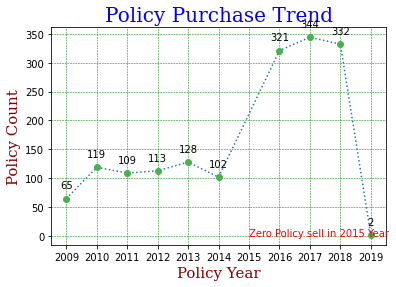

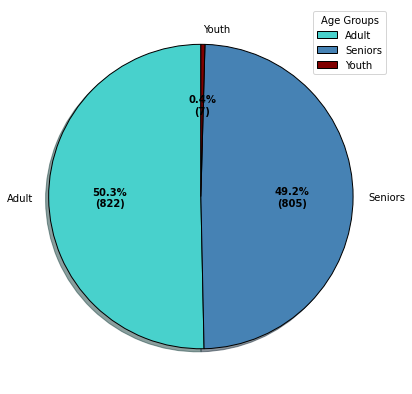

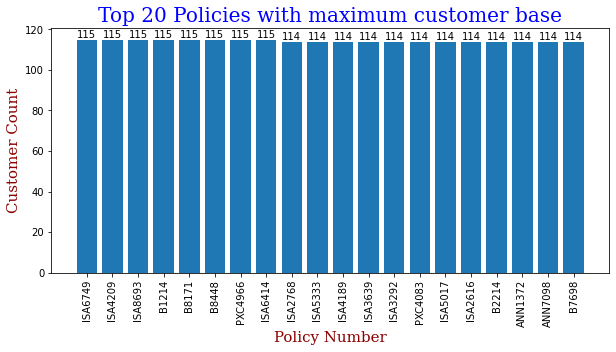

In [254]:
# Insert your answer below: 
import matplotlib.pyplot as plt

CustPolicy=Policy_Table.merge(Customer_Table, how='left', on=['Customer ID'])
#Policy Trend
CustPolicy['PolicyYear'] = pd.DatetimeIndex(CustPolicy['Policy Start Date']).year
#CustPolicy['PolicyYear']=CustPolicy['PolicyYear'].astype(str)
trendData=CustPolicy.groupby(['PolicyYear'])['Policy Number'].count().reset_index(name='PolicyCount')
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.plot(trendData['PolicyYear'],trendData['PolicyCount'],marker = 'o',mec = '#4CAF50', mfc = '#4CAF50', linestyle = 'dotted')
plt.xticks(np.arange(min(trendData['PolicyYear']), max(trendData['PolicyYear'])+1, 1.0))
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.title("Policy Purchase Trend",fontdict = font1)
plt.xlabel("Policy Year",fontdict = font2)
plt.ylabel("Policy Count",fontdict = font2)
plt.annotate(xy=[2015,0], text='Zero Policy sell in 2015 Year',color='red')

for x,y in zip(trendData['PolicyYear'],trendData['PolicyCount']):

    label = "{:}".format(y)

    plt.annotate(label,
                 (x,y), 
                 textcoords="offset points",
                 xytext=(0,10), 
                 ha='center') 

plt.show()
#Define Condition for Age Group Calculation
conditions = [
    (CustPolicy['Age'] <= 14),
    (CustPolicy['Age'] > 14) & (CustPolicy['Age'] <= 24),
    (CustPolicy['Age'] > 24) & (CustPolicy['Age'] <= 64),
    (CustPolicy['Age'] > 64)
    ]
#Age Group values
values = ['Children', 'Youth', 'Adult', 'Seniors']
CustPolicy['AgeGroup'] = np.select(conditions, values)

#Data Set for Age Group Policy count visualization
Agegroupanalysis=CustPolicy.groupby(['AgeGroup'])['Policy Number'].count().reset_index(name='PolicyCount')
#Plotting Pie Chart
color = ['mediumturquoise', 'steelblue', 'maroon', 'lightcoral']
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)    
wp = { 'linewidth' : 1, 'edgecolor' : "black" }       
fig = plt.figure(figsize =(10, 7))
wedges,texts, autotexts =plt.pie(Agegroupanalysis['PolicyCount'],autopct = lambda pct: func(pct, Agegroupanalysis['PolicyCount']),
                         labels=Agegroupanalysis["AgeGroup"], colors=color,shadow = True, startangle = 90,wedgeprops = wp,
                         textprops = dict(color ="black"))
ax.set_title("Age Group wise Policy Count Distribusion",fontdict = font1)
plt.legend(title = "Age Groups")
plt.setp(autotexts, size = 10, weight ="bold")                        
plt.show()               

#Top 20 Policies with maximum customer base
#Calculate top 20 Policies
PolicyCustCount=Fund_Table.groupby(['Policy Number'])['Customer ID'].count().reset_index(name='CustCount')
PolicyCustCount.sort_values('CustCount', inplace = True,ascending=False)
TopPolicy=PolicyCustCount.head(20)
#Plot a Bar chart
fig = plt.figure(figsize =(10, 4.5))
plt.bar(TopPolicy['Policy Number'],TopPolicy['CustCount'])
plt.xticks(rotation=90, horizontalalignment="center")
plt.title("Top 20 Policies with maximum customer base",fontdict = font1)
plt.xlabel("Policy Number",fontdict = font2)
plt.ylabel("Customer Count",fontdict = font2)

for x,y in zip(TopPolicy['Policy Number'],TopPolicy['CustCount']):
    label = "{:}".format(y)
    plt.annotate(label,
                 (x,y), 
                 textcoords="offset points",
                 xytext=(0,2), 
                 ha='center') 

plt.show()